# Mean Force Integration in 1D

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

100.0%   OFE = 0.3738


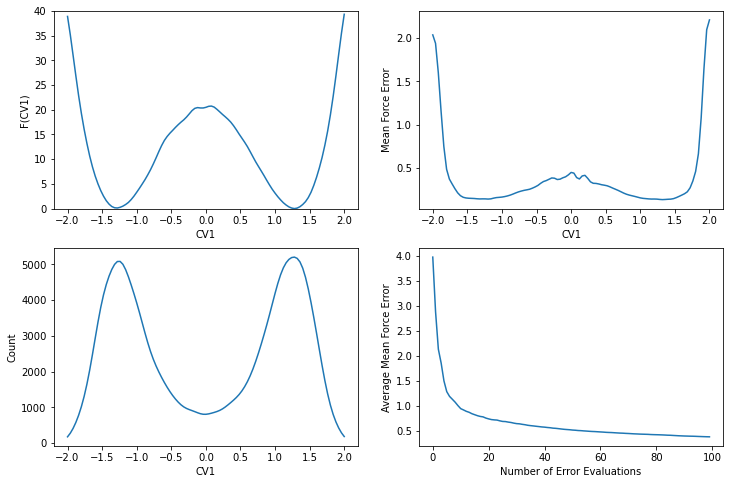

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI1D
import os
os.chdir("/home/antoniu/Desktop/MFI_git/MFI_master/MFI/1D_double_well")

#Read the HILLS file
HILLS=MFI1D.load_HILLS(hills_name="HILLS")

#Read the Colvar File
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force
[X, Ftot_den, Ftot, ofe_map, ofe_history] = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 1, error_pace = 100, min_grid=-2.0, max_grid=2.0, WellTempered=0)

# Integrate Ftot, obtain FES 
FES = MFI1D.intg_1D(X,Ftot)

# Plot Recap
MFI1D.plot_recap(X, FES, Ftot_den, ofe_map, ofe_history,lim=40)


(-40.0, 40.0)

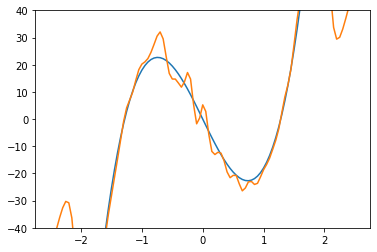

In [21]:
# plt.plot(X, Ftot)

F = 7*X**4-23*X**2
Ff = 28*X**3 - 46*X
F = F - min(F)

plt.plot(X,Ff)
plt.plot(X, Ftot)
plt.ylim(-40,40)